### Code to split the dataset into train, val and test set

In [5]:
import os
import shutil
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image


Put your own path to the training set

In [6]:
data_dir = "C://Users//frank//Desktop//sketches_png//png"

Run the cell below if you want to split the data set

In [6]:
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)

    files = [os.path.join(category_dir, f) for f in os.listdir(category_dir) if f.endswith('.png')]


    train_files, test_files = train_test_split(files, test_size=0.3, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)


    for folder in ['train', 'val', 'test']:
        os.makedirs(os.path.join(data_dir, folder, category), exist_ok=True)

    
    def copy_files(files, dest_folder):
        for f in files:
            shutil.copy(f, os.path.join(data_dir, dest_folder, category))

    
    copy_files(train_files, 'train')
    copy_files(val_files, 'val')
    copy_files(test_files, 'test')

print("Split the data set into train, val and test.")

'for category in os.listdir(data_dir):\n    category_dir = os.path.join(data_dir, category)\n\n    files = [os.path.join(category_dir, f) for f in os.listdir(category_dir) if f.endswith(\'.png\')]\n\n\n    train_files, test_files = train_test_split(files, test_size=0.3, random_state=42)\n    val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)\n\n\n    for folder in [\'train\', \'val\', \'test\']:\n        os.makedirs(os.path.join(data_dir, folder, category), exist_ok=True)\n\n    \n    def copy_files(files, dest_folder):\n        for f in files:\n            shutil.copy(f, os.path.join(data_dir, dest_folder, category))\n\n    \n    copy_files(train_files, \'train\')\n    copy_files(val_files, \'val\')\n    copy_files(test_files, \'test\')\n\nprint("Split the data set into train, val and test.")'

In [7]:
train_dir = "C:/Users/frank/Desktop/TU_berlin/train"

Let observe 4 of those sketches

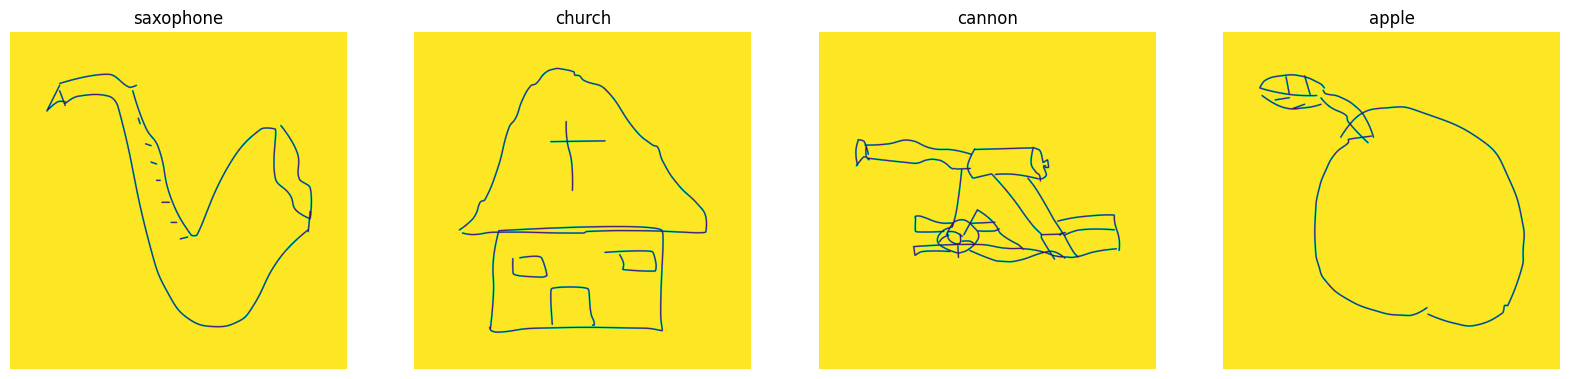

In [9]:
image_paths = []
image_classes = []
for root, dirs, files in os.walk(train_dir):
    for file in files:
        if file.endswith('.png'):
            image_paths.append(os.path.join(root, file))
            image_classes.append(os.path.basename(root))


selected_indices = random.sample(range(len(image_paths)), 4)


fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, idx in zip(axes, selected_indices):
    img = Image.open(image_paths[idx])
    ax.imshow(img)
    ax.set_title(image_classes[idx])
    ax.axis('off')

plt.show()
